import librosa 
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd


# SeCoT 2019: Computação Musical e Aprendizado de Máquina

---

## Parte 1: Diferentes representações da música e suas interpretações gerais

In [59]:
x, fs = librosa.core.load(librosa.util.example_audio_file(), sr=None)
print(f'Quantidade de pontos no vetor: {x.size} floats')
print(f'Frequência de amostragem na qual a faixa foi gravada: {fs} Hz')
print(f'Tempo de duração da faixa: {x.size/fs} segundos')
print(f'Alguns exemplos de como o áudio é carregado pelo librosa {x[3000:3010]}')


# plt.plot(x[3000:4000])
ipd.Audio(x, rate=fs)

Quantidade de pontos no vetor: 2710336 floats
Frequência de amostragem na qual a faixa foi gravada: 44100 Hz
Tempo de duração da faixa: 61.45886621315193 segundos
Alguns exemplos de como o áudio é carregado pelo librosa [-0.04495239 -0.04403687 -0.04310608 -0.04216003 -0.04119873 -0.04032898
 -0.03952026 -0.03883362 -0.03814697 -0.03729248]


### 1.1 -- Formas de onda

- É um tipo de representação mais básico e que não tem muita informação aparente
- É a forma de um sinal que se move como uma onda em um meio físico
- Varia em função do tempo
- Informação legal: a forma de onda de um som pode afetar o seu timbre. Sintetizadores
geram sons com formas mais diferentonas

Exemplos de formas de onda periódicas:

![diferentes formas de onda](imgs/ondas.png)

imagem retirada da [Wikipedia](https://en.m.wikipedia.org/wiki/Waveform)

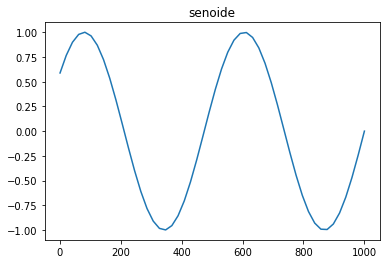

In [43]:
# se tiver curiosidade, muda esses parâmetrose vê como a onda abaixo muda (:
amplitude = 1
comprimento_onda = 10
fase = 0

# seno a*sen(2*pi*tempo-fase/comprimento de onda)
seno_x = np.linspace(1, 1000)
seno_y = amplitude * np.sin((2*np.pi*x-fase)/comprimento_onda)

plt.title("senoide")
plt.plot(seno_x,seno_y)

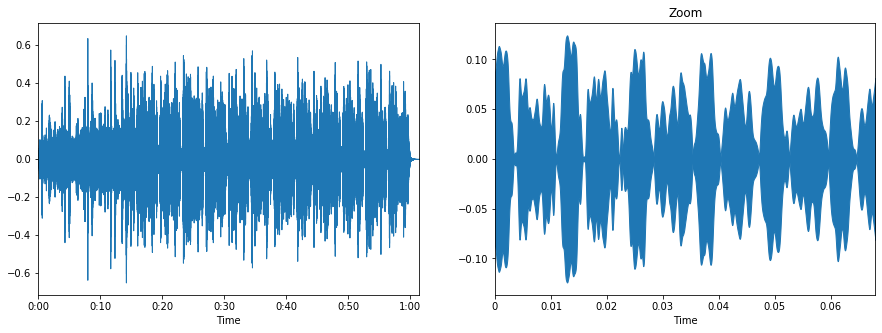

In [48]:
plt.figure(figsize=(15,5))
plt.title("Audio todo")
plt.subplot(1,2,1)
librosa.display.waveplot(x, sr=fs)
plt.subplot(1,2,2)
plt.title("Zoom")
librosa.display.waveplot(x[5000:8000], sr=fs)

### 1.2 -- Espectrogramas

- representações do áudio no domínio da frequência
- trazem informações mais úteis sobre o que está acontecendo na música, mas descarta
toda a informação de fase 


[[1.05011764e-04 3.85672785e-04 1.01486221e-02 ... 2.22575949e-07
  0.00000000e+00 0.00000000e+00]
 [9.30881870e-05 1.06594421e-03 1.00159133e-02 ... 2.22548437e-07
  0.00000000e+00 0.00000000e+00]
 [6.09021299e-05 1.68653252e-03 4.34327871e-03 ... 2.22465900e-07
  0.00000000e+00 0.00000000e+00]
 ...
 [5.88917203e-07 2.65583149e-05 9.99580952e-05 ... 1.25959350e-08
  0.00000000e+00 0.00000000e+00]
 [1.37812697e-06 1.15359699e-05 4.01940779e-05 ... 1.25958870e-08
  0.00000000e+00 0.00000000e+00]
 [1.64943106e-06 7.19996592e-07 3.09203242e-05 ... 1.25958719e-08
  0.00000000e+00 0.00000000e+00]]


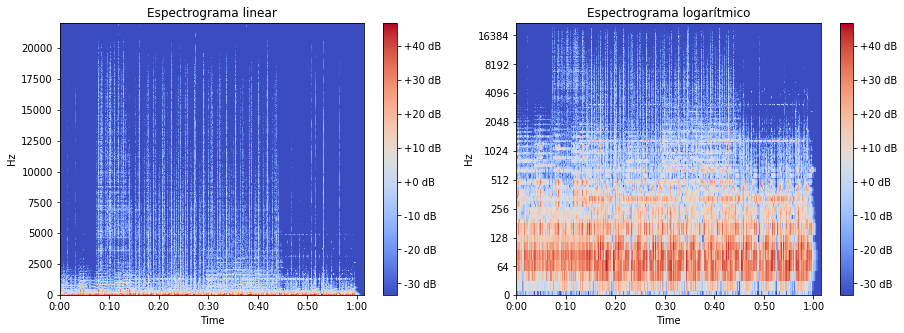

In [60]:
# antes de plotar o espectrograma em si, temos que mudar o domínio do nosso vetor
# para isso, usamos a transformada de Fourier

# mudamos o domínio para o da frequência
X = np.abs(librosa.core.stft(x))
print(X)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Espectrograma linear")
librosa.display.specshow(librosa.amplitude_to_db(X), sr=fs, x_axis="time", y_axis="linear")
plt.colorbar(format='%+2.0f dB')

plt.subplot(1,2,2)
plt.title("Espectrograma logarítmico")
librosa.display.specshow(librosa.amplitude_to_db(X), sr=fs, x_axis="time", y_axis="log")
plt.colorbar(format='%+2.0f dB')


### 1.3 -- Outras representações

Além do espectrograma e do áudio puro (raw), existem outras representações que são muito usadas.
* STFT (Short Term Fourier Transform)
* MFCC (Mel-Frequency Cepstrum Coeficients)
* Cromagrama
* Tempograma
* Constante-Q
* etc

O uso da entrada depende tanto do sistema que você está desenvolvendo. Todos têm suas vantagens e
desvantagens. Por exemplo, o áudio puro tem muito mais informações que podem ser aproveitadas do que
um espectrograma, contudo seu processamento requer mais poder computacional. Da mesma forma, o 
espectrograma tem uma repesentação mais compacta do áudio e, mesmo assim, pode ter atributos que
são relevantes para a grande maioria das tarefas. Por isso até é uma das representações mais usadas.

Informação interessante: existem algumas representações que buscam simular a maneira que ouvimos e, para isso,
usam escala logarítmica, já que a maneira que ouvimos as frequências segue ela. 
Exemplos de escala são: escala Mel, escala Bark e ERB. 

---
## Parte 2: Identificando elementos do áudio

Agora que a gente já conhece algumas das representações, vamos ver o tipo de informação
e características que conseguimos extrair do áudio e como fazer isso.

Lembrando que não é muito útil a gente ter essas características em relação ao áudio todo
porque isso não consegue captar o que acontece localmente. É mais interessante dividirmos 
o sinal em frames e daí extrair as características.

### 2.1 -- Energia (Energy)
A energia é a magnitude total de um sinal. No caso de sinais de áudio, correspondem ao quão 
"alto" um sinal é.

    $$ \sum_n \left| x(n) \right|^2 $$
    
    
### 2.2 -- Taxa de Cruzamento por Zero (Zero Crossing Rate)
A [taxa de cruzamento por zero](https://en.wikipedia.org/wiki/Zero-crossing_rate) indica 
quantas vezes o sinal cruzou o eixo horizontal, ou seja, qual a taxa de variação desse sinal. 

### 2.3 -- MFCCs (Mel-Frequency Cepstrum Coeficients)

### 2.4 -- etc
Tem muita coisa que pode ser calculada a partir de um sinal de áudio e a gente não vai entrar
em detalhes nessa palestra. Contudo, deixei referências muito boas caso alguém tenha curiosidade.


---

## Parte 3: Alguns exemplos de aplicação

### Sentimentos classificados de acordo com algumas de suas características musicais

| Sentimento     | Intensidade | Timbre      | Tom         | Ritmo       |
|----------------|-------------|-------------|-------------|-------------|
| Feliz          | Média       | Médio       | Muito Alto  | Muito Alto  |
| Exuberante     | Alta        | Médio       | Alto        | Alto        |
| Energético     | Muito Alta  | Médio       | Médio       | Alto        |
| Frenético      | Alta        | Muito Alto  | Baixo       | Muito Alto  |
| Ansioso/Triste | Média       | Muito Baixo | Muito Baixo | Baixo       |
| Deprimido      | Baixa       | Baixo       | Baixo       | Baixo       |
| Calmo          | Muito Baixa | Muito Baixo | Médio       | Muito Baixo |
| Contente       | Baixa       | Baixo       | Alto        | Baixo       |


Fonte: https://sites.tufts.edu/eeseniordesignhandbook/2015/music-mood-classification/

## Referências
- [mir](https://musicinformationretrieval.com/)
- [librosa](https://librosa.github.io/)
